<a href="https://www.kaggle.com/code/zahrash9/titanic-drawn-in-data?scriptVersionId=127483373" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

this is a training notebook, mainly inspired by: <br>
https://www.kaggle.com/code/shaumilsahariya/case-study-of-titanic/notebook  <br>
https://www.kaggle.com/code/kagleo123/titanic-eda-machine-deep-learning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#ML s
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report


from sklearn.preprocessing import OneHotEncoder
from scipy.stats import mode

from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [2]:
# test=pd.read_csv('/content/drive/MyDrive/ML learning/titanic/test.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')

the other dataset is the survival states



In [4]:
# sub= pd.read_csv('/content/drive/MyDrive/ML learning/titanic/gender_submission.csv')
sub= pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [6]:
df=pd.concat([sub, test], axis=1)

### Feature Information
1. **PassengerId:** id of passenger
2. **Survival:** 0 = No, 1 = Yes
3. **pclass:** (Ticket class) 
   * 1 = 1st, 2 = 2nd, 3 = 3rd
   * 1st = Upper / 2nd = Middle /3rd = Lower
4. **Name:** name of the passanger
5. **sex:** male/female
6. **Age:** Age in years (Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5)
7. **sibsp:** # of siblings / spouses aboard the Titanic
   
   The dataset defines family relations in this way...
   * Sibling = brother, sister, stepbrother, stepsister
   * Spouse = husband, wife (mistresses and fiancés were ignored)
8. **parch:** # of parents / children aboard the Titanic
   
   The dataset defines family relations in this way...
   * Parent = mother, father
   * Child = daughter, son, stepdaughter, stepson
   * Some children travelled only with a nanny, therefore parch=0 for them.
9. **ticket:** Ticket number
10. **fare:** Passenger fare
11. **cabin:** Cabin number
12. **embarked:** Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

# some facts about titanic


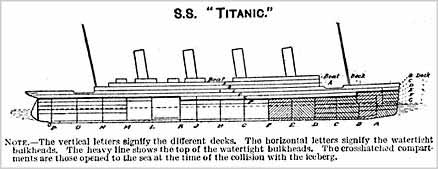

In [ ]:
from PIL import Image
import requests
from io import BytesIO

url= 'https://www.slrc.info/uploadedImages/www/locations/central/business_science_and_technology/how-to_guides/Titanic.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

coming soon

# overall look

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   PassengerId  418 non-null    int64  
 3   Pclass       418 non-null    int64  
 4   Name         418 non-null    object 
 5   Sex          418 non-null    object 
 6   Age          332 non-null    float64
 7   SibSp        418 non-null    int64  
 8   Parch        418 non-null    int64  
 9   Ticket       418 non-null    object 
 10  Fare         417 non-null    float64
 11  Cabin        91 non-null     object 
 12  Embarked     418 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 42.6+ KB


converting dtypes for better manipulation

In [9]:
df=df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    Int64  
 1   Survived     418 non-null    Int64  
 2   PassengerId  418 non-null    Int64  
 3   Pclass       418 non-null    Int64  
 4   Name         418 non-null    string 
 5   Sex          418 non-null    string 
 6   Age          332 non-null    Float64
 7   SibSp        418 non-null    Int64  
 8   Parch        418 non-null    Int64  
 9   Ticket       418 non-null    string 
 10  Fare         417 non-null    Float64
 11  Cabin        91 non-null     string 
 12  Embarked     418 non-null    string 
dtypes: Float64(2), Int64(6), string(5)
memory usage: 45.8 KB


In [10]:
df.isna().sum()

PassengerId      0
Survived         0
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

So, we have 2 featues filled with float values, 5 integer features, 5 strings.

In [11]:
df.drop(columns=['PassengerId'],inplace=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,<NA>,Q
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0,<NA>,S
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,<NA>,Q
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,<NA>,S
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,<NA>,S
...,...,...,...,...,...,...,...,...,...,...,...
413,0,3,"Spector, Mr. Woolf",male,<NA>,0,0,A.5. 3236,8.05,<NA>,S
414,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C
415,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,<NA>,S
416,0,3,"Ware, Mr. Frederick",male,<NA>,0,0,359309,8.05,<NA>,S


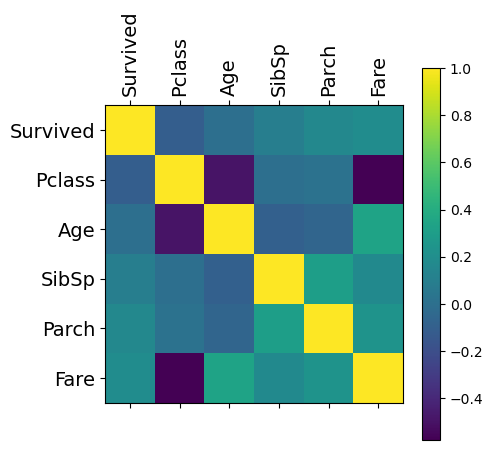

In [14]:
# corrolation matrix!
# note that the Pclass order is reverse, so the more negetive corrolated, meand more corrolated!
cor=df.corr()

plt.matshow(cor)
plt.colorbar()
plt.xticks(np.arange(6),cor.columns, fontsize=14, rotation=90);
plt.yticks(np.arange(6),cor.columns, fontsize=14, rotation=0);



note to self:  write about it

yea, it makes sense. we will explore the meaning of this corr matrix in the proceeding sections.

# exploring the data

## percentage of survival

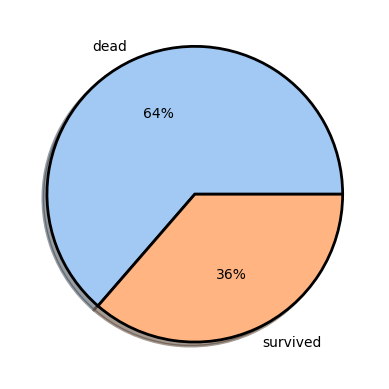

In [17]:
# the precentage of lucky ones?

surv=df["Survived"].value_counts()
colors = sns.color_palette('pastel')[0:5]
plt.pie(surv.values, labels=['dead','survived'],colors = colors,autopct='%.0f%%',shadow=True,wedgeprops = {"edgecolor" : "black",'linewidth': 2,'antialiased': True});

I personally thought there was a greater percentage of death in Titanic.

## Pclass VS Survival

<Axes: xlabel='Pclass', ylabel='count'>

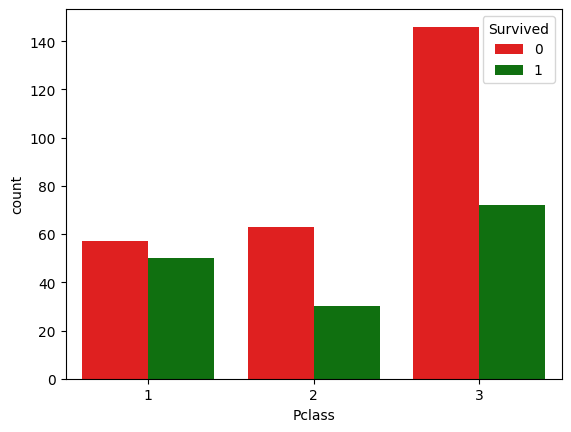

In [ ]:
sns.countplot(data=df, x='Pclass', hue='Survived',palette=['r','g','b'])


but it dosnt show the important thing clearly. lets see it in another way

In [15]:
counts=df.groupby(['Pclass'])["Survived"].value_counts().to_frame()
vals= df.groupby(['Pclass'])['Pclass'].value_counts().to_frame()
percen= pd.DataFrame({'dead':[],'Survived':[]})

for i in vals.index.levels[0]:
  percen=percen.append( dict(zip( ['dead','Survived'],(counts.loc[(i,)]/vals.loc[(i,)].values).values[:,0] ) ) , ignore_index=True )

percen

,dead,Survived
0,0.532710,0.467290
1,0.677419,0.322581
2,0.669725,0.330275


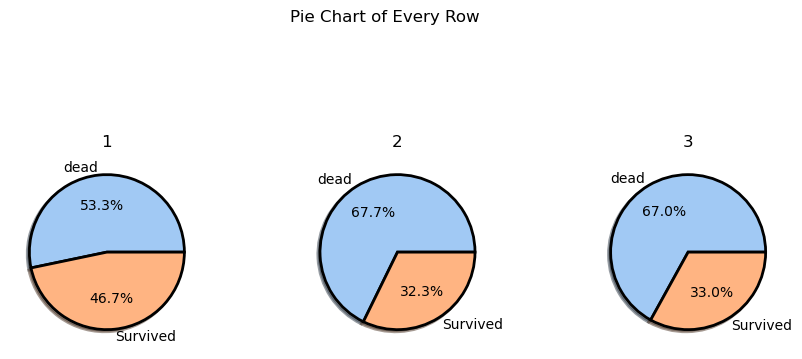

In [18]:
fig, axs = plt.subplots(1, len(percen), figsize=(10,5))

for i, row in percen.iterrows():
    axs[i].pie(row.values, labels=row.index, autopct='%1.1f%%',colors = colors,shadow=True,wedgeprops = {"edgecolor" : "black",'linewidth': 2,'antialiased': True});
    axs[i].set_title(i+1)
 

fig.suptitle('Pie Chart of Every Row')

plt.subplots_adjust(wspace=0.5)

plt.show()

ok, so not the more money better life rule. the 2nd and 3rd class have nearlly the same stats of survival. but why? <br>


*   age of the people in every class?
*   the position of each class in the ship?
* the family members that the pople was trying to rescue which leads to theire own death?
* were there alone in the world?
* ...?



### importance of the Age in survival rate in every Pclass

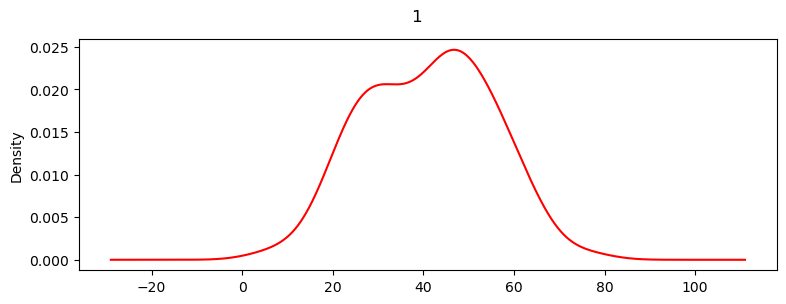

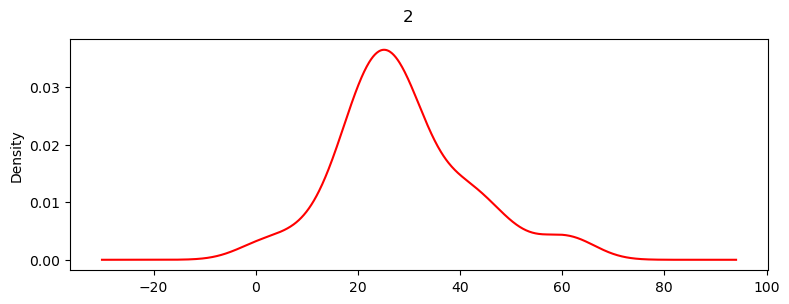

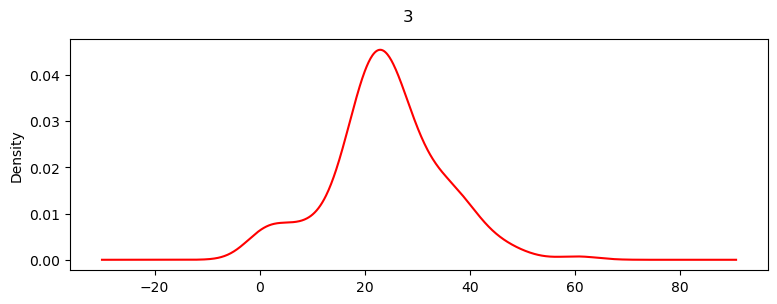

In [172]:
for i in range(1,4):
    df[(df['Pclass']==i) ]['Age'].plot(title=i,kind='kde',subplots=True,color=colors[0],figsize=(9,3))
    plt.show()
